# DAT 203 - Lab Assignment #8

- Author: Colin Bowers
- Date: July 8, 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 

1. Import the dataset and run a complete analysis of it.
    1. Your target is column name “gnd”
1. Split the data into training and testing
1. Apply any feature selection algorithm and choose the best features.
1. Use any classifier and report the accuracy 
1. Apply PCA dimensionality reduction technique to the original data. 
1. Plot a 2-dimensional representation of the data based on the first and second principal components, explain the results versus the known classes (display each class with a different color). 
1. Repeat step 6 for the 20th and 21st components and comment on the result
1. Plot a 2-dimensional representation of the original data using t-SNE, compare the output with PCA’s output in Step 6 and 7, and explain the results versus the known classes.
1. Use the any classifier to classify 6 sets of dimensionality reduced data (using 2, 4, 10, 30, 40, 256 PCA components). [plot these showing the error]
1. Plot the classification error for the 6 sets and the number of chosen components. 


**1 - Import the dataset and run a complete analysis of it. Your target is column name “gnd”**

In [2]:
df = pd.read_csv("data/Data.csv")
df.shape

(800, 258)

In [3]:
df.sample(5)

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.248,fea.249,fea.250,fea.251,fea.252,fea.253,fea.254,fea.255,fea.256,gnd
302,303,-1.000000,-1.000000,-1.000000,-1.000000,-0.999743,-0.979082,-0.687191,-0.030166,-0.090280,...,0.172368,-0.008102,-0.630473,-0.943485,-0.997104,-0.999968,-1.000000,-1.000000,-1.000000,1
430,431,-1.000000,-0.999999,-0.999896,-0.998049,-0.985611,-0.915256,-0.654684,-0.192397,-0.080060,...,-0.999887,-0.999979,-0.998838,-0.975465,-0.808276,-0.395344,-0.211884,-0.640586,-0.941368,2
41,42,-1.000000,-1.000000,-1.000000,-0.999947,-0.996648,-0.938028,-0.594832,-0.063481,-0.220194,...,0.043662,0.103129,-0.139231,-0.552819,-0.885797,-0.990362,-0.999714,-0.999997,-1.000000,0
152,153,-0.999997,-0.999887,-0.997959,-0.981879,-0.901457,-0.687554,-0.321971,0.150154,0.442976,...,0.518486,0.514117,0.411043,0.122918,-0.225251,-0.600870,-0.873862,-0.977228,-0.997596,0
691,692,-0.995865,-0.931911,-0.699476,-0.369311,-0.086681,0.134563,0.267806,0.364667,0.400477,...,0.148869,-0.028722,-0.164524,-0.255732,-0.430029,-0.623016,-0.809641,-0.947682,-0.994182,3


In [4]:
df.gnd.value_counts()

0    200
1    200
2    200
3    200
Name: gnd, dtype: int64

In [5]:
df.describe()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.248,fea.249,fea.250,fea.251,fea.252,fea.253,fea.254,fea.255,fea.256,gnd
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,-0.991409,-0.968831,-0.917406,-0.820467,-0.676586,-0.495195,-0.266342,-0.080204,-0.153667,...,-0.108339,-0.139846,-0.371067,-0.597333,-0.743848,-0.838149,-0.901319,-0.945590,-0.977662,1.500000
std,231.0844,0.047754,0.118036,0.207387,0.309470,0.411327,0.467895,0.448563,0.419555,0.429422,...,0.467927,0.478690,0.457282,0.420004,0.352270,0.289812,0.231492,0.166216,0.088638,1.118733
min,1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,200.7500,-1.000000,-1.000000,-1.000000,-0.999894,-0.993603,-0.931390,-0.650477,-0.281856,-0.429037,...,-0.371477,-0.502065,-0.774185,-0.961959,-0.995128,-0.999893,-1.000000,-1.000000,-1.000000,0.750000
50%,400.5000,-1.000000,-0.999974,-0.998744,-0.984838,-0.885552,-0.636180,-0.266676,0.015629,-0.080399,...,0.007508,-0.005553,-0.409065,-0.754701,-0.924648,-0.981403,-0.997410,-0.999896,-0.999998,1.500000
75%,600.2500,-0.999922,-0.996333,-0.953919,-0.762624,-0.450571,-0.080921,0.125815,0.232491,0.184588,...,0.261937,0.231008,0.020544,-0.319118,-0.606411,-0.819666,-0.943618,-0.991112,-0.999377,2.250000
max,800.0000,-0.342725,0.112006,0.367011,0.468162,0.523140,0.527240,0.530853,0.531079,0.531191,...,0.526726,0.529774,0.531124,0.526003,0.489672,0.505559,0.469148,0.168234,-0.230614,3.000000


## Feature Selection 

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

**2 - Split the data into training and testing**

In [7]:
target = "gnd"
predictors = list(df.columns)
predictors.remove(target)
len(predictors)

257

In [8]:
train, test = train_test_split(df, test_size=0.2)

X_train = train[predictors]
y_train = train[target]

X_test = test[predictors]
y_test = test[target]


**3 - Apply any feature selection algorithm and choose the best features.**

In [9]:
%%time
from sklearn.feature_selection import RFE

rfe_model = DecisionTreeClassifier()
rfe = RFE(rfe_model, n_features_to_select=1)
rfe.fit(X_train, y_train)
rfe.score(X_test, y_test)

CPU times: user 3.73 s, sys: 0 ns, total: 3.73 s
Wall time: 3.72 s


0.99375

In [10]:
rank = pd.DataFrame({
    "name": X_train.columns.to_list(),
    "rank": rfe.ranking_
})
rank.set_index("name", inplace=True)
rank.sort_values(by=["rank"], inplace=True)
rank.head(10)

,rank
name,
Unnamed: 0,1
fea.253,2
fea.252,3
fea.251,4
fea.250,5
fea.249,6
fea.248,7
fea.247,8
fea.246,9


## Train a model

**4 - Use any classifier and report the accuracy**

In [11]:
model = DecisionTreeClassifier(random_state=0)
model = model.fit(X_train, y_train)

In [12]:
y_pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      1.00      1.00        35
           2       1.00      0.97      0.99        37
           3       1.00      1.00      1.00        41

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



In [13]:
mat = metrics.confusion_matrix(y_pred, y_test)
print(mat)

[[47  0  1  0]
 [ 0 35  0  0]
 [ 0  0 36  0]
 [ 0  0  0 41]]


## PCA dimensionality reduction

In [14]:
from sklearn.decomposition import PCA

**5 - Apply PCA dimensionality reduction technique to the original data.**

In [15]:
%%time

df2 = df.drop("gnd", axis=1)

pca = PCA()
data_pca = pca.fit_transform(df2)
data_pca = pd.DataFrame(data_pca)
data_pca["gnd"] = df["gnd"]

CPU times: user 1min 48s, sys: 2min 23s, total: 4min 11s
Wall time: 32.5 s


In [16]:
data_pca.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,gnd
511,-111.505858,1.342812,6.263894,0.309907,-0.619432,-1.883881,-0.557768,0.121880,-2.872269,0.924407,...,0.001723,0.000653,0.002078,-0.000853,-0.000189,-0.000742,0.000193,3.462804e-09,1.271068e-08,2
794,-394.525562,0.547592,-2.909960,0.070285,-0.575978,0.035844,0.747221,-0.472697,0.953632,-2.188578,...,-0.002861,-0.002144,0.000181,-0.000195,0.000342,0.000671,0.000035,-1.461773e-07,2.041759e-07,3
179,220.560258,9.038605,0.472499,0.327094,-0.927261,2.683428,-2.332217,-1.025313,1.063103,-1.110362,...,0.001561,0.002349,0.003431,-0.001786,0.000832,-0.000429,-0.000312,6.219640e-08,2.250808e-07,0
585,-185.493694,-0.119912,7.326456,-2.129700,1.373642,1.211103,2.131810,0.906513,-1.824003,0.759014,...,0.001153,0.000363,-0.002304,0.000038,0.001033,-0.000390,0.000359,1.856715e-07,-1.114377e-08,2
340,59.494884,-6.404705,-1.815737,-2.196637,1.794382,0.209526,-0.317942,0.160728,-0.142013,0.426999,...,0.000132,0.000597,0.000666,-0.000184,0.000004,0.000102,0.000019,-2.760520e-08,-4.894592e-08,1


**6 - Plot a 2-dimensional representation of the data based on the first and second principal components, explain the results versus the known classes (display each class with a different color).**

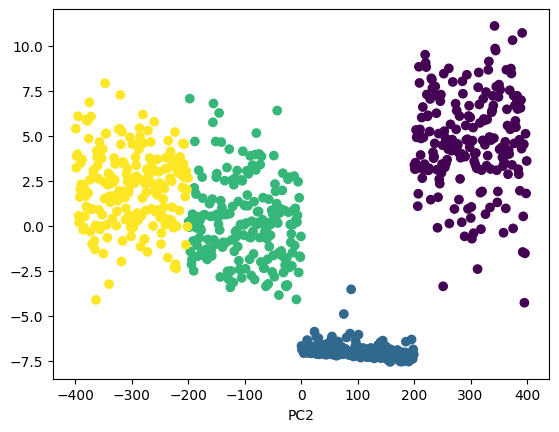

In [17]:
plt.scatter(data_pca[0], data_pca[1], c=data_pca.gnd)
plt.xlabel("PC1")
plt.xlabel("PC2")
plt.show()

**Comments:**



**7 - Repeat step 6 for the 20th and 21st components and comment on the result**

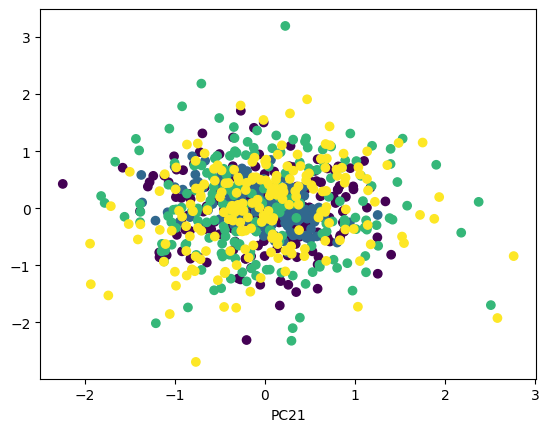

In [18]:
plt.scatter(data_pca[19], data_pca[20], c=df.gnd)
plt.xlabel("PC20")
plt.xlabel("PC21")
plt.show()

## t-SNE

**8 - Plot a 2-dimensional representation of the original data using t-SNE, compare the output with PCA’s output in Step 6 and 7, and explain the results versus the known classes.**

In [19]:
%%time
from sklearn.manifold import TSNE

df3 = df.drop("gnd", axis=1)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df3)
df_tsne = pd.DataFrame(tsne_results)
df_tsne["gnd"] = df["gnd"]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.003s...
[t-SNE] Computed neighbors for 800 samples in 0.327s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 14.466274
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.416245
[t-SNE] KL divergence after 300 iterations: 0.311909
CPU times: user 1min 44s, sys: 12.4 s, total: 1min 56s
Wall time: 17.2 s


In [20]:
df_tsne.sample(5)

,0,1,gnd
54,9.414474,8.062439,0
381,-3.646214,-4.301101,1
603,-7.945167,8.621240,3
341,-3.247167,-8.621697,1
39,10.762961,8.898750,0


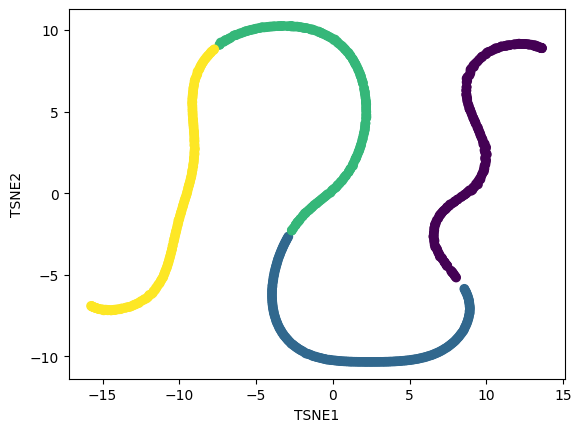

In [21]:
plt.scatter(df_tsne[0], df_tsne[1], c=df_tsne["gnd"])
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()

**Comments:**

//TODO

## Dimentionality Comparison

**9 - Use the any classifier to classify 6 sets of dimensionality reduced data (using 2, 4, 10, 30, 40, 256 PCA components).**

In [22]:
loop = [2, 4, 10, 30, 40, 256]
#loop = [2, 4, 10]
results = [ ]

df2 = df.drop("gnd", axis=1)

for n in loop:

    p = PCA(n_components = n)
    p.fit(df2)
    df_p = p.transform(df2)
    df_p = pd.DataFrame(df_p)
    
    df_p["gnd"] = df["gnd"]

    train_p, test_p = train_test_split(df_p, test_size=0.2)

    X_train_p = train_p.iloc[:, 0:n]
    y_train_p = train_p["gnd"]

    X_test_p = test_p.iloc[:, 0:n]
    y_test_p = test_p["gnd"]

    m = DecisionTreeClassifier(random_state=0)
    m = model.fit(X_train_p, y_train_p)

    y_pred_p = m.predict(X_test_p)
    score = metrics.accuracy_score(y_test_p, y_pred_p)
    
    print(f"For n={n}: {len(df_p.columns)} columns, accuracy is {score}")
    
    results.append(score)

print("Done.")
print(results)

For n=2: 3 columns, accuracy is 1.0
For n=4: 5 columns, accuracy is 1.0
For n=10: 11 columns, accuracy is 1.0
For n=30: 31 columns, accuracy is 1.0
For n=40: 41 columns, accuracy is 1.0
For n=256: 257 columns, accuracy is 0.99375
Done.
[1.0, 1.0, 1.0, 1.0, 1.0, 0.99375]


**10 - Plot the classification error for the 6 sets and the number of chosen components.**

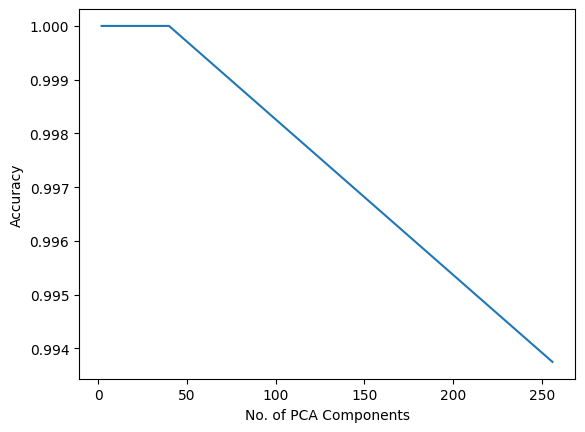

In [23]:
plt.plot(loop, results, "-")
plt.xlabel("No. of PCA Components")
plt.ylabel("Accuracy")
plt.show()